# Variables in the World Happiness Report 

## by Danya Ramirez

## Investigation Overview

Data is everywhere nowadays, and lots of it. 

Sometimes, this is necessary. But sometimes, it may seem overreach. 

This humble analysis intends to detect whether or not all variables in the World Happiness Report should be included.

## Dataset Overview

The analysis explores data from the World Happiness Report (2016 - 2017 - 2018 - 2019).

This is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be (from [data.world](http://data.world)). 

The report also includes results from the Gallup survey, which scores citizens' perceptions regarding their situation in relation to a variety of topics.

The dataset contains nine variables and 624 rows. 

The variables include: 
- country
- year 
- happiness score 
- GDP per capita 
- social support
- Healthy Life Expectancy
- perception of freedom to make choices
- generosity
- and perceptions of corruption in government and businesses

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb
import plotly.express as px

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
happy = pd.read_csv("world_happiness_report.csv")

In [3]:
# Create a copy of the dataframe to keep all the original data untouched
happy_original = happy.copy()

In [4]:
# In order to keep the data as consistent as possible within the country, replace the null value with the mean of
# the values associated with this country only.
uae = happy.query("Country == 'United Arab Emirates'")
happy.at[331,'Perceptions of corruption'] = uae["Perceptions of corruption"].mean()

In [5]:
# Change column names to more manageable names
happy.rename(columns={"Country":"country", "Year":"year", "Score":"score","Social support":"support",
                      "GDP per capita": "gdp_pc", "Healthy life expectancy": "hale", 
                      "Freedom to make life choices":"freedom", "Generosity": "gen", 
                      "Perceptions of corruption":"perc_corr"}, inplace=True)

## What is the happiness score worldwide?

### If we consider the happiness score as a range from 0 to 10, 

### what was the score worldwide? Did it improve from 2016 to 2019?

In [6]:
# Isolate data for score means per year
years = happy.groupby("year", as_index = False)["score"].mean()

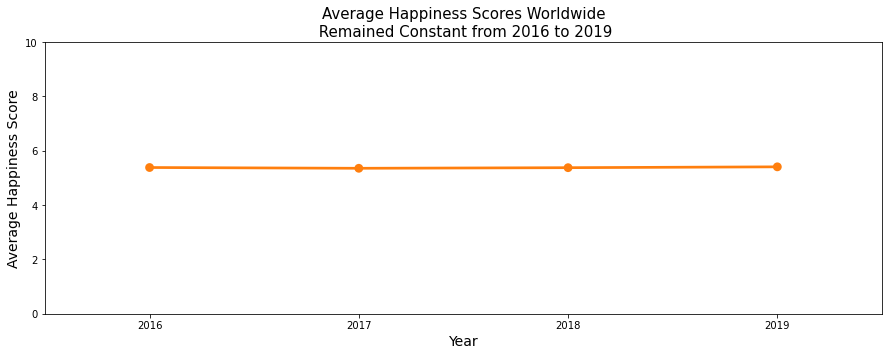

In [13]:
fig, ax = plt.subplots(figsize=[15,5])
base_color = sb.color_palette()[1]
plot = sb.pointplot(ax = ax, data = years, x = "year", y = "score", color = base_color)
plot.axes.set_title("Average Happiness Scores Worldwide\n Remained Constant from 2016 to 2019",fontsize=15)
plot.set_xlabel("Year",fontsize=14)
plot.set_ylabel("Average Happiness Score",fontsize=14)
plt.ylim(0, 10);

### What did we learn?

That happiness scores around the world remained stable from 2016 to 2019 between 5.3 and 5.4.

## Let's look further.

## Which countries had the highest and lowest happiness scores in 2019?


In [ ]:
# Isolate data for 2019
y2019 = happy.query("year == '2019'")

In [ ]:
# Create horizontal barplot (interactive) with all happiness scores for 2019.
fig = px.bar(y2019, x = 'score', y = 'country', 
             hover_data = {"score":":.2f"}, 
             height = 3500,
             color_discrete_sequence =['orange']*len(y2019),
             labels={
                     "score": "Happiness Score",
                     "country": "Country"
                 })

fig.update_layout(
    font_family = "Avenir",
    font_color = "Black",
    font_size = 13,
    title_font_family = "Avenir",
    title_font_color = "Dark Gray",
    title = "World Happiness Scores for 2019 per country",
    title_font_size = 15,
    legend_title_font_color = "Black",
    plot_bgcolor= 'rgba(0, 0, 0, 0)')
    

fig.update_xaxes(title_font_family = "Avenir")

### What did we learn?

Western countries in Europe and the American Continent, and African and Middle Eastern countries seem to be at opposite ends of the Happiness Score continuum. 

Countries in Western Europe and the American Continent toward the highest end, and African and Middle Eastern countries, toward the lowest end.

Some exceptions to that rule: Israel, UAE and Saudi Arabia are some of the Middle Eastern countries on the higher score group.

## How does Happiness Score correlate with the other variables in the report?

In [ ]:
# Isolate numerical variables to create a correlation matrix
numeric = happy[["score", "gdp_pc", "support", "hale", "freedom", "gen", "perc_corr"]]

In [ ]:
# Create correlation matrix heatmap plot (code guide from https://heartbeat.fritz.ai/)
fig = plt.figure(figsize = [10,8])
matrix = np.triu(numeric.corr())
x_axis_labels = ["Happiness score", "GDP per capita", "Social support", "Healthy Life Expectancy", "Freedom of choice", "Generosity", "Perceptions of corruption"]
y_axis_labels = ["Happiness score", "GDP per capita", "Social support", "Healthy Life Expectancy", "Freedom of choice", "Generosity", "Perceptions of corruption"]
sb.heatmap(numeric.corr(), annot = True, cmap = 'coolwarm', mask=matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45);

### What did we learn?

All variables are at least moderately correlated with Happiness Score, except for "Generosity."

Besides Healthy Life Expectancy and GDP per capita, Social support generated the strongest correlation with the score.

## Are these correlations kept accross time?

The following scatter plots show a lack of correlation across the board for *generosity* and *happiness scores*.

In [ ]:
# Create Faceted Grids with scatterplots for the happiness score and generosity, one per year 2016, 2017, 2018, 2019.
g = sb.FacetGrid(data = happy, col = "year", height = 4)
g.map(sb.scatterplot, "score", "gen")
g.set_titles('{col_name}')
g.axes[0,0].set_xlabel('Happiness score', fontsize='x-large')
g.axes[0,1].set_xlabel('Happiness score', fontsize='x-large')
g.axes[0,2].set_xlabel('Happiness score', fontsize='x-large')
g.axes[0,3].set_xlabel('Happiness score', fontsize='x-large')
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize='xx-large')
    ax.set_ylabel("Social Support", fontsize='x-large');

### What did we learn?

While these show how the correlation between *support* and *happiness scores* has increased over time.

(Indeed, when grouped by year, the correlation goes over 0.7 every year.)

In [ ]:
# Create Faceted Grids with scatterplots for the happiness score and support, one per year 2016, 2017, 2018, 2019.
g = sb.FacetGrid(data = happy, col = "year", height = 4)
g.map(sb.scatterplot, "score", "support")
g.set_titles('{col_name}')
g.axes[0,0].set_xlabel('Happiness score', fontsize='x-large')
g.axes[0,1].set_xlabel('Happiness score', fontsize='x-large')
g.axes[0,2].set_xlabel('Happiness score', fontsize='x-large')
g.axes[0,3].set_xlabel('Happiness score', fontsize='x-large')
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize='xx-large')
    ax.set_ylabel("Social Support", fontsize='x-large');

### To sum up...

"Generosity" - at least how it is defined in this report - has no correlation with Happiness Scores.

Which is not necessarily unexpected:

Generosity was defined as the ratio of donations in the year over GDP per capita. 

In this regard, does a higher GDP necessarily entail that all economic groups in a country have spare resources to donate? 

Moreover, is the term "generosity" not receiving a rather narrow definition in this report?

Different cultures may regard generosity in different ways that are either as or more impactful and/or satisfactory than monetary transactions. 

In any case, the lack of correlation leaves unexplained why this variable was included in the report.

On the other hand, besides GDP per capita and Healthy Life Expectancy - variables that are not determined by people's *perceptions*-

Social Support - or having people to count on in times of trouble - is the variable that most strongly correlates with the Happiness Score.

...Financial resources, health and community. It makes sense.

All this means that besides making sure people have access to a dignified income and health care, 

it is important that people create and maintain meaningful social networks,

and that local organizations, governments and businesses provide citizens with the time flexibility, the place, and the support to overcome limitations to do so. Regardless of race, gender, age, sexual orientations, and religion.

### Back to you: 

Do you feel that you have social support? How could you contribute to the creation of social support networks in your community or workplace?

In [ ]:
!jupyter nbconvert presentation.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] Converting notebook presentation.ipynb to slides
[NbConvertApp] Writing 608002 bytes to presentation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/presentation.slides.html
Use Control-C to stop this server
